In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
activity = pd.read_csv('Activity.csv')
activity['timestamp'] = np.where(activity['activity_type'] == 'start',-activity['timestamp'], activity['timestamp'])
activity = activity.groupby(['machine_id'], as_index = False).agg(
    sum_time = ('timestamp','sum'),
    sum_process = ('process_id','nunique')
)
activity['processing_time'] = round(activity['sum_time']/activity['sum_process'],3)
activity[['machine_id','processing_time']]

,machine_id,processing_time
0,0,0.894
1,1,0.995
2,2,1.456


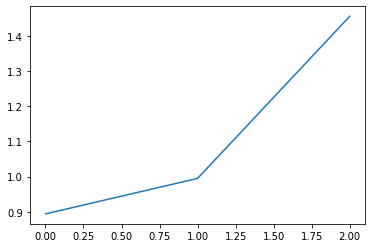

In [7]:
plt.figure()
plt.plot(activity['machine_id'],activity['processing_time'])
plt.show()